In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px            

In [2]:
app = pd.read_csv("D:\\Feynn-Labs\\archive (2)\\application_record.csv")

In [3]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
cred = pd.read_csv("D:\\Feynn-Labs\\archive (2)\\credit_record.csv")

In [5]:
cred

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
data = pd.merge(app, cred, on='ID')

In [7]:
data = data.dropna()

In [8]:
data['FLAG_OWN_CAR'].value_counts()

N    306207
Y    231460
Name: FLAG_OWN_CAR, dtype: int64

In [9]:
print(data['NAME_INCOME_TYPE'].value_counts())
print('\n')
print(data['NAME_EDUCATION_TYPE'].value_counts())
print('\n')
print(data['NAME_FAMILY_STATUS'].value_counts())
print('\n')
print(data['NAME_HOUSING_TYPE'].value_counts())
print('\n')
print(data['OCCUPATION_TYPE'].value_counts())
print('\n')
print(data['STATUS'].value_counts())

Working                 332868
Commercial associate    151412
State servant            52733
Pensioner                  332
Student                    322
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64


Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Widow                    12243
Name: NAME_FAMILY_STATUS, dtype: int64


House / apartment      474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64


Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers             

In [10]:
data['STATUS'].value_counts().keys() 

Index(['C', '0', 'X', '1', '5', '2', '3', '4'], dtype='object')

In [11]:
data_ovr = [data[data["STATUS"] == i].sample(226185, replace = True) for i in data['STATUS'].value_counts().keys()]

In [12]:
data = pd.concat(data_ovr).sample(frac = 1.0, random_state=1).reset_index(drop = True)

In [13]:
data = data.sample(frac = 0.01, random_state=1).reset_index(drop = True)

In [14]:
data['STATUS'].value_counts()

C    2385
1    2319
4    2290
X    2252
3    2242
5    2228
2    2195
0    2184
Name: STATUS, dtype: int64

In [15]:
data.shape

(18095, 20)

In [16]:
y = data['STATUS']
data = data.drop(['ID'], axis=1)

In [17]:
data = data.drop(columns = ['STATUS'])

In [18]:
def change_gen(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 0
    else:
        print('ERROR')


def change_flag(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        print('ERROR')

In [19]:
data['CODE_GENDER'] = data['CODE_GENDER'].apply(change_gen)
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].apply(change_flag)
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].apply(change_flag)

In [20]:
data2 = data.copy()

In [21]:
one_hot_encoded = pd.get_dummies(data['NAME_INCOME_TYPE'], prefix='category', drop_first = True)

In [22]:
# one_hot_encoded
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(['NAME_INCOME_TYPE'], axis=1)

In [23]:
one_hot_encoded2 = pd.get_dummies(data['NAME_EDUCATION_TYPE'], prefix='category', drop_first = True)

data = pd.concat([data, one_hot_encoded2], axis=1)
data = data.drop(['NAME_EDUCATION_TYPE'], axis=1)

In [24]:
one_hot_encoded3 = pd.get_dummies(data['NAME_FAMILY_STATUS'], prefix='category', drop_first = True)

data = pd.concat([data, one_hot_encoded3], axis=1)
data = data.drop(['NAME_FAMILY_STATUS'], axis=1)

In [25]:
one_hot_encoded4 = pd.get_dummies(data['NAME_HOUSING_TYPE'], prefix='category', drop_first = True)

data = pd.concat([data, one_hot_encoded4], axis=1)
data = data.drop(['NAME_HOUSING_TYPE'], axis=1)

In [26]:
data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'category_Pensioner',
       'category_State servant', 'category_Student', 'category_Working',
       'category_Higher education', 'category_Incomplete higher',
       'category_Lower secondary', 'category_Secondary / secondary special',
       'category_Married', 'category_Separated',
       'category_Single / not married', 'category_Widow',
       'category_House / apartment', 'category_Municipal apartment',
       'category_Office apartment', 'category_Rented apartment',
       'category_With parents'],
      dtype='object')

In [27]:
data2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,0,0,0,0,225000.0,Working,Higher education,Single / not married,House / apartment,-10809,-3900,1,0,1,0,Laborers,1.0,-11
1,0,0,0,0,94500.0,Working,Higher education,Married,House / apartment,-16825,-196,1,0,0,0,Security staff,2.0,-27
2,1,0,1,0,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15302,-596,1,1,1,0,Laborers,2.0,-38
3,1,1,1,1,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-16314,-882,1,0,0,0,Managers,2.0,-39
4,0,0,1,1,81000.0,Working,Secondary / secondary special,Married,Municipal apartment,-15749,-6367,1,1,1,0,Cleaning staff,3.0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,1,1,0,382500.0,Commercial associate,Higher education,Married,House / apartment,-20054,-6427,1,0,1,0,Managers,2.0,-21
18091,0,0,1,1,108000.0,Working,Secondary / secondary special,Married,House / apartment,-12723,-1132,1,1,1,0,Sales staff,3.0,-36
18092,1,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16204,-925,1,1,1,0,Drivers,3.0,-39
18093,0,0,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13921,-2542,1,0,0,0,Sales staff,2.0,-36


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder_occ = LabelEncoder()

# Fit and transform the 'category_column' using LabelEncoder
data['OCCUPATION_TYPE'] = label_encoder_occ.fit_transform(data['OCCUPATION_TYPE'])

In [29]:
data.OCCUPATION_TYPE

0         8
1        16
2         8
3        10
4         1
         ..
18090    10
18091    14
18092     4
18093    14
18094    11
Name: OCCUPATION_TYPE, Length: 18095, dtype: int32

In [30]:
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,category_Secondary / secondary special,category_Married,category_Separated,category_Single / not married,category_Widow,category_House / apartment,category_Municipal apartment,category_Office apartment,category_Rented apartment,category_With parents
0,0,0,0,0,225000.0,-10809,-3900,1,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,94500.0,-16825,-196,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,247500.0,-15302,-596,1,1,1,...,1,1,0,0,0,1,0,0,0,0
3,1,1,1,1,315000.0,-16314,-882,1,0,0,...,1,0,1,0,0,1,0,0,0,0
4,0,0,1,1,81000.0,-15749,-6367,1,1,1,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,1,1,0,382500.0,-20054,-6427,1,0,1,...,0,1,0,0,0,1,0,0,0,0
18091,0,0,1,1,108000.0,-12723,-1132,1,1,1,...,1,1,0,0,0,1,0,0,0,0
18092,1,1,1,1,112500.0,-16204,-925,1,1,1,...,1,1,0,0,0,1,0,0,0,0
18093,0,0,1,0,157500.0,-13921,-2542,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [31]:
data.dtypes

CODE_GENDER                                 int64
FLAG_OWN_CAR                                int64
FLAG_OWN_REALTY                             int64
CNT_CHILDREN                                int64
AMT_INCOME_TOTAL                          float64
DAYS_BIRTH                                  int64
DAYS_EMPLOYED                               int64
FLAG_MOBIL                                  int64
FLAG_WORK_PHONE                             int64
FLAG_PHONE                                  int64
FLAG_EMAIL                                  int64
OCCUPATION_TYPE                             int32
CNT_FAM_MEMBERS                           float64
MONTHS_BALANCE                              int64
category_Pensioner                          uint8
category_State servant                      uint8
category_Student                            uint8
category_Working                            uint8
category_Higher education                   uint8
category_Incomplete higher                  uint8


In [32]:
mid = data.shape[1]//2

left = data.iloc[:, :mid]
left

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,category_Pensioner
0,0,0,0,0,225000.0,-10809,-3900,1,0,1,0,8,1.0,-11,0
1,0,0,0,0,94500.0,-16825,-196,1,0,0,0,16,2.0,-27,0
2,1,0,1,0,247500.0,-15302,-596,1,1,1,0,8,2.0,-38,0
3,1,1,1,1,315000.0,-16314,-882,1,0,0,0,10,2.0,-39,0
4,0,0,1,1,81000.0,-15749,-6367,1,1,1,0,1,3.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,1,1,0,382500.0,-20054,-6427,1,0,1,0,10,2.0,-21,0
18091,0,0,1,1,108000.0,-12723,-1132,1,1,1,0,14,3.0,-36,0
18092,1,1,1,1,112500.0,-16204,-925,1,1,1,0,4,3.0,-39,0
18093,0,0,1,0,157500.0,-13921,-2542,1,0,0,0,14,2.0,-36,0


In [33]:
right = data.iloc[:, mid:]
right

,category_State servant,category_Student,category_Working,category_Higher education,category_Incomplete higher,category_Lower secondary,category_Secondary / secondary special,category_Married,category_Separated,category_Single / not married,category_Widow,category_House / apartment,category_Municipal apartment,category_Office apartment,category_Rented apartment,category_With parents
0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
18091,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
18092,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
18093,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [34]:
left

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,category_Pensioner
0,0,0,0,0,225000.0,-10809,-3900,1,0,1,0,8,1.0,-11,0
1,0,0,0,0,94500.0,-16825,-196,1,0,0,0,16,2.0,-27,0
2,1,0,1,0,247500.0,-15302,-596,1,1,1,0,8,2.0,-38,0
3,1,1,1,1,315000.0,-16314,-882,1,0,0,0,10,2.0,-39,0
4,0,0,1,1,81000.0,-15749,-6367,1,1,1,0,1,3.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,1,1,0,382500.0,-20054,-6427,1,0,1,0,10,2.0,-21,0
18091,0,0,1,1,108000.0,-12723,-1132,1,1,1,0,14,3.0,-36,0
18092,1,1,1,1,112500.0,-16204,-925,1,1,1,0,4,3.0,-39,0
18093,0,0,1,0,157500.0,-13921,-2542,1,0,0,0,14,2.0,-36,0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler_amt = StandardScaler()

scaled_d = scaler_amt.fit_transform(data[['AMT_INCOME_TOTAL']])

In [36]:
scaled_d

array([[ 0.19140391],
       [-0.96078903],
       [ 0.39005786],
       ...,
       [-0.80186586],
       [-0.40455795],
       [-0.80186586]])

In [37]:
data['AMT_INCOME_TOTAL'] = scaled_d

In [38]:
scaler_dob = StandardScaler()

scaled_d1 = scaler_dob.fit_transform(data[['DAYS_BIRTH']])
data['DAYS_BIRTH'] = scaled_d1

scaler_days = StandardScaler()
scaled_d2 = scaler_days.fit_transform(data[['DAYS_EMPLOYED']])
data['DAYS_EMPLOYED'] = scaled_d2

In [39]:
scaler_occ = StandardScaler()

scaled_d3 = scaler_occ.fit_transform(data[['OCCUPATION_TYPE']])
data['OCCUPATION_TYPE'] = scaled_d3

In [40]:
scaler_cnt = StandardScaler()

scaled_d4 = scaler_cnt.fit_transform(data[['CNT_FAM_MEMBERS']])
data['CNT_FAM_MEMBERS'] = scaled_d4

In [41]:
scaler_mon = StandardScaler()

scaled_d5 = scaler_mon.fit_transform(data[['MONTHS_BALANCE']])
data['MONTHS_BALANCE'] = scaled_d5

In [42]:
y = pd.DataFrame(y) 

In [43]:
def y_change(n):
    if n == 'X':
        return 6
    if n == 'C':
        return 7
    else:
        return int(n)

y['STATUS'] = y['STATUS'].apply(y_change)

In [44]:
y['STATUS'].value_counts() 

7    2385
1    2319
4    2290
6    2252
3    2242
5    2228
2    2195
0    2184
Name: STATUS, dtype: int64

In [45]:
data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'category_Pensioner',
       'category_State servant', 'category_Student', 'category_Working',
       'category_Higher education', 'category_Incomplete higher',
       'category_Lower secondary', 'category_Secondary / secondary special',
       'category_Married', 'category_Separated',
       'category_Single / not married', 'category_Widow',
       'category_House / apartment', 'category_Municipal apartment',
       'category_Office apartment', 'category_Rented apartment',
       'category_With parents'],
      dtype='object')

In [46]:
y = np.array(y)
y

array([[0],
       [1],
       [2],
       ...,
       [5],
       [6],
       [3]], dtype=int64)

In [47]:
X = data

In [48]:
X = X.values

In [49]:
X[95]

array([ 0.        ,  0.        ,  1.        ,  0.        , -0.40455795,
       -1.08845452,  0.19938584,  1.        ,  0.        ,  0.        ,
        0.        ,  0.11602799, -1.33098412,  1.20459647,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [50]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
}

In [52]:
model1 = GradientBoostingClassifier()
model2 = XGBClassifier()
model3 = LGBMClassifier()
model4 = AdaBoostClassifier()
model5 = CatBoostClassifier()

In [53]:
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [56]:
model1 = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 150)
model2 = XGBClassifier(learning_rate = 0.05, n_estimators = 100)
model3 = LGBMClassifier(learning_rate = 0.05, n_estimators = 50)
model4 = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 100)
model5 = CatBoostClassifier(learning_rate = 0.1, n_estimators = 50)

In [57]:
model1.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=150)

In [58]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
model3.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 16285, number of used features: 29
[LightGBM] [Info] Start training from score -2.120878
[LightGBM] [Info] Start training from score -2.044505
[LightGBM] [Info] Start training from score -2.116280
[LightGBM] [Info] Start training from score -2.087147
[LightGBM] [Info] Start training from score -2.074358
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.021063


LGBMClassifier(learning_rate=0.05, n_estimators=50)

In [60]:
model4.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [61]:
model5.fit(X_train, y_train)

0:	learn: 2.0494377	total: 201ms	remaining: 9.83s
1:	learn: 2.0168595	total: 237ms	remaining: 5.69s
2:	learn: 1.9945684	total: 270ms	remaining: 4.23s
3:	learn: 1.9664092	total: 302ms	remaining: 3.47s
4:	learn: 1.9519910	total: 331ms	remaining: 2.98s
5:	learn: 1.9281722	total: 366ms	remaining: 2.69s
6:	learn: 1.9102344	total: 400ms	remaining: 2.46s
7:	learn: 1.8925097	total: 437ms	remaining: 2.29s
8:	learn: 1.8828765	total: 468ms	remaining: 2.13s
9:	learn: 1.8711136	total: 500ms	remaining: 2s
10:	learn: 1.8643667	total: 530ms	remaining: 1.88s
11:	learn: 1.8561917	total: 561ms	remaining: 1.78s
12:	learn: 1.8452837	total: 593ms	remaining: 1.69s
13:	learn: 1.8330763	total: 627ms	remaining: 1.61s
14:	learn: 1.8284749	total: 657ms	remaining: 1.53s
15:	learn: 1.8209190	total: 688ms	remaining: 1.46s
16:	learn: 1.8143354	total: 720ms	remaining: 1.4s
17:	learn: 1.8052263	total: 751ms	remaining: 1.33s
18:	learn: 1.7947936	total: 784ms	remaining: 1.28s
19:	learn: 1.7882157	total: 816ms	remaining: 

In [62]:
ensemble = VotingClassifier(estimators=[('gb', model1), ('xgb', model2), ('lgb', model3), ('ada', model4), ('cat', model5)], voting='soft')

In [63]:
ensemble.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 16285, number of used features: 29
[LightGBM] [Info] Start training from score -2.120878
[LightGBM] [Info] Start training from score -2.044505
[LightGBM] [Info] Start training from score -2.116280
[LightGBM] [Info] Start training from score -2.087147
[LightGBM] [Info] Start training from score -2.074358
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.021063
0:	learn: 2.0494377	total: 37.7ms	remaining: 1.85s
1:	learn: 2.0168595	total: 72.1ms	remaining: 1.73s
2:	learn: 1.9945684	total: 103ms	remaining: 1.62s
3:	learn: 1.9664092	total: 136ms	remaining: 1.57s
4:	learn: 1.95

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=150)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.05,
                                             n_estimators=50)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=100)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x00000180A3E01150>)],
                 voting='soft')

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test.reshape(1, -1)[0], ensemble.predict_proba(X_test), multi_class = 'ovr')

0.8618862591933955

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

def report(model, x, y, xt, yt):
  model.fit(x, y)
  yp = model.predict(xt)
  print(classification_report(yt, yp))

  cm = confusion_matrix(yt, yp)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 16285, number of used features: 29
[LightGBM] [Info] Start training from score -2.120878
[LightGBM] [Info] Start training from score -2.044505
[LightGBM] [Info] Start training from score -2.116280
[LightGBM] [Info] Start training from score -2.087147
[LightGBM] [Info] Start training from score -2.074358
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.087642
[LightGBM] [Info] Start training from score -2.021063
0:	learn: 2.0494377	total: 34.3ms	remaining: 1.68s
1:	learn: 2.0168595	total: 66.3ms	remaining: 1.59s
2:	learn: 1.9945684	total: 98.5ms	remaining: 1.54s
3:	learn: 1.9664092	total: 132ms	remaining: 1.52s
4:	learn: 1.9

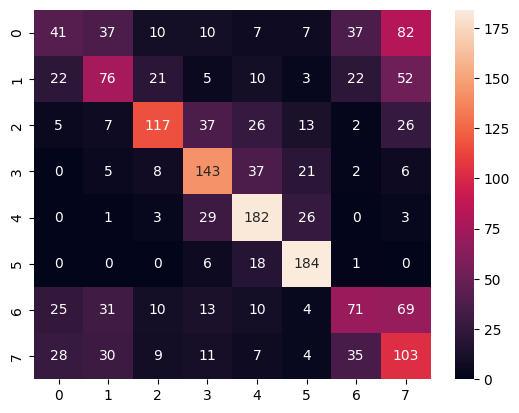

In [66]:
report(ensemble, X_train, y_train, X_test, y_test)

In [67]:
left

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,category_Pensioner
0,0,0,0,0,225000.0,-10809,-3900,1,0,1,0,8,1.0,-11,0
1,0,0,0,0,94500.0,-16825,-196,1,0,0,0,16,2.0,-27,0
2,1,0,1,0,247500.0,-15302,-596,1,1,1,0,8,2.0,-38,0
3,1,1,1,1,315000.0,-16314,-882,1,0,0,0,10,2.0,-39,0
4,0,0,1,1,81000.0,-15749,-6367,1,1,1,0,1,3.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,0,1,1,0,382500.0,-20054,-6427,1,0,1,0,10,2.0,-21,0
18091,0,0,1,1,108000.0,-12723,-1132,1,1,1,0,14,3.0,-36,0
18092,1,1,1,1,112500.0,-16204,-925,1,1,1,0,4,3.0,-39,0
18093,0,0,1,0,157500.0,-13921,-2542,1,0,0,0,14,2.0,-36,0


In [76]:
lst = []

gen = int(input("Enter Your Gender : "))
lst.append(gen)

car = int(input("Do You have a car : "))
lst.append(car)

prop = int(input("Do you own any property : "))
lst.append(prop)

child = int(input("How many Childer you have : "))
lst.append(child)

inc = int(input("Enter Your Total Income : "))
inc = scaler_amt.transform([[inc]])
lst.append(inc)

dob = int(input("Enter How many days passed since your B'day : "))
dob = -dob
dob = scaler_dob.transform([[dob]])
lst.append(dob)


emp = int(input("Enter how many days ypu got employed : "))
emp = -emp
emp = scaler_days.transform([[emp]])
lst.append(emp)


mob = int(input("Do you have a mobile phone : "))
lst.append(mob)

work_ph = int(input("Do you have a work phone : "))
lst.append(work_ph)

fg_ph = int(input("Do you have another phone : "))
lst.append(fg_ph)

email = int(input("Do you have email : "))
lst.append(email)

occ = input("Enter Your Occupation : ")
occ_int = label_encoder_occ.transform([occ])
occ_int = scaler_occ.transform([occ_int])
lst.append(occ_int)


cnt_fam = int(input("How many family members are there : "))
cnt_fam = scaler_cnt.transform([[cnt_fam]])
lst.append(cnt_fam)

cred = int(input("When did you apply for cred card : "))
cred = -cred
cred = scaler_mon.transform([[cred]])
lst.append(cred)


inc_type_dict = {'Pensioner' : 0, 'State servant' : 0, 'Student' : 0, 'Working' : 0}
inc_type = input("ENter Income Type : ")
if inc_type in list(inc_type_dict.keys()):
    inc_type_dict[inc_type] = 1
inc_list = list(inc_type_dict.values())
lst.extend(inc_list)


edu_type_dict = {'Higher education' : 0, 'Incomplete higher' : 0, 'Lower secondary' : 0, 'Secondary / secondary special' : 0}
edu_type = input("Enter EDU : ")
if edu_type in list(edu_type_dict.keys()):
    edu_type_dict[edu_type] = 1
edu_list = list(edu_type_dict.values())
lst.extend(edu_list)


rel_type_dict = {'Married' : 0, 'Separated' : 0, 'Single / not married' : 0, 'Widow' : 0}
rel_type = input("ENter Relationship status : ")
if rel_type in list(rel_type_dict.keys()):
    rel_type_dict[rel_type] = 1
rel_list = list(rel_type_dict.values())
lst.extend(rel_list)

house_type_dict = {'House / apartment' : 0, 'Municipal apartment' : 0, 'Office apartment' : 0, 'Rented apartment' : 0, 
                  'With parents' : 0}
house_type = input("ENter House type : ")
if house_type in list(house_type_dict.keys()):
    house_type_dict[house_type] = 1
house_list = list(house_type_dict.values())
lst.extend(house_list)


Enter Your Gender :  1
Do You have a car :  0
Do you own any property :  0
How many Childer you have :  2
Enter Your Total Income :  3000


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Enter How many days passed since your B'day :  11000


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Enter how many days ypu got employed :  2000


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Do you have a mobile phone :  1
Do you have a work phone :  0
Do you have another phone :  0
Do you have email :  1
Enter Your Occupation :  Drivers


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


How many family members are there :  4


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


When did you apply for cred card :  1


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ENter Income Type :  Working
Enter EDU :  Lower secondary
ENter Relationship status :  Married
ENter House type :  House / apartment


In [77]:
len(lst)

31

In [78]:
len(X[0])

31

In [79]:
final_lst = []
for i in lst:
    try : 
        final_lst.append(i[0][0])
    except Exception:
        final_lst.append(float(i))


In [80]:
'''0: 1-29 days past due 
   1: 30-59 days past due 
   2: 60-89 days overdue 
   3: 90-119 days overdue 
   4: 120-149 days overdue 
   5: Overdue or bad debts write-offs for more than 150 days 
   7: paid off that month 
   6: No loan for the month'''

status_dict = {
    0: "1-29 days past due",
    1: "30-59 days past due",
    2: "60-89 days overdue",
    3: "90-119 days overdue",
    4: "120-149 days overdue",
    5: "Overdue or bad debts write-offs for more than 150 days",
    7: "Paid off that month",
    6: "No loan for the month"
}


is_eligible = ensemble.predict([final_lst])
print(f'THE CANDIDATE AFTER TAKING A LOAN ON CREDIT CARD IS PROBABLY EXPECTED TO HAVE : "{status_dict[is_eligible[0]]}"')


THE CANDIDATE AFTER TAKING A LOAN ON CREDIT CARD IS PROBABLY EXPECTED TO HAVE : "30-59 days past due"


In [81]:
data2.OCCUPATION_TYPE.value_counts() 

Laborers                 4314
Core staff               2890
Managers                 2414
Sales staff              1932
Drivers                  1628
High skill tech staff    1222
Accountants               827
Medicine staff            733
Security staff            669
Cooking staff             432
Cleaning staff            286
Low-skill Laborers        275
IT staff                  142
Private service staff     141
Waiters/barmen staff       83
Secretaries                45
HR staff                   36
Realty agents              26
Name: OCCUPATION_TYPE, dtype: int64

In [82]:
data2.NAME_INCOME_TYPE.value_counts()

Working                 10608
Commercial associate     5797
State servant            1451
Pensioner                 233
Student                     6
Name: NAME_INCOME_TYPE, dtype: int64

In [83]:
data2.NAME_HOUSING_TYPE.value_counts()

House / apartment      15588
With parents             987
Municipal apartment      908
Rented apartment         236
Office apartment         204
Co-op apartment          172
Name: NAME_HOUSING_TYPE, dtype: int64